# Spectrum study and filtering of an audio file

We recovered a signal corresponding to a white Gaussian noise (<https://fr.wikipedia.org/wiki/Bruit_blanc>) using a sampling at 8192 Hz.

The data (the "noise" vector) are available in the signal `White_Noise_8192Hz.npz`.

You are asked to: 
1. Load the data, and play it as an audio file using the `Audio` function of the `IPython.display` module, then display it as a function of time.
2. Correct the code provided to apply the FFT on this signal, justifying the corrections performed.
3. Create a low-pass filter with a cutoff frequency of 200 Hz, get the output signal that this filter would give us if we apply the white noise in input, and represent the frequency content of this output signal.
4. Play the data as an audio file and compare with the original signal
5. Represent the experimental gain observed on this filter (the ratio between the amplitudes of the output and input frequency components), expressed in dB $(20 \cdot \log_{10})$, on a semi-logarithmic frequency scale.
6. Superimpose on this representation the Bode diagram of the filter.

#### 1 - Loading the data, and diplaying the data as a function of time.

In [42]:
import numpy as np

data = np.load('White_Noise_8192Hz.npz')
noise = data['noise']
noise

array([-1.56196378,  1.6749223 , -0.77169215, ...,  0.9967885 ,
       -0.63253864, -0.72806276], shape=(16384,))

In [43]:
from IPython.display import Audio

Fs = 8192
Audio(noise, rate=Fs)

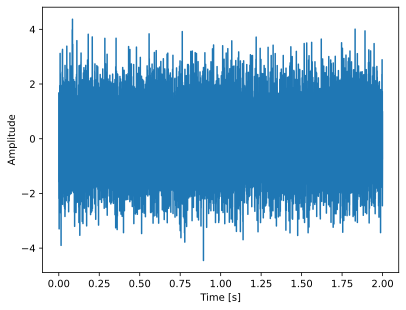

In [44]:
from matplotlib import pyplot as plt

# better plots in jupyter
%config InlineBackend.figure_formats = ['svg']

Ts = 1 / Fs
N = len(noise)

t = np.arange(0, N*Ts, Ts)
plt.plot(t,noise)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

#### 2 - Correct the code below (aiming to apply the FFT to the sound signal) and explain the correction done.

Here's the code to correct :

```python
import numpy as np
from matplotlib import pyplot as plt

X = np.fft.fft(noise)
N = len(X)
Amp = abs(X) / N
Amp = Amp[:N//2] * 2
dF = Fs / N
n = np.arange(1, len(Amp))
f = n * dF
plt.stem(f,Amp)
plt.show()
```

In [45]:
X = np.fft.fft(noise)
N = len(X)
Amp = abs(X) / N
Amp = Amp[:N//2+1] * 2 # We need to go only to Fs/2 inclusive
Amp[0] = Amp[0] / 2    # DC component should not be doubled
dF = Fs / N
print(dF)
n = np.arange(len(Amp)) # 0Hz should be included
f = n * dF
plt.stem(f,Amp)
plt.show()

0.5


#### 3 - Low-pass filter creation, with a bandwidth of 200 Hz. Then we get the output signal of this filter if the white noise is applied at its input, and we plot the frequency spectrum of this filtered signal.

In [46]:
import control as ct

Fc = 200
s = ct.tf('s')
Hf = 1 / (s * 1 / Fc + 1)          # Filter creation
Hf.name = "Low-pass filter"
print(Hf)

# N = len(noise)
# Fs = 8192
# Ts = 1 / Fs
t = np.arange(0, N*Ts, Ts)         # Time vector creation, with as many samples as the
                                   # sounds signal and a sampling period corresponding to Fs

_, y_bf = ct.forced_response(Hf, t, noise)  # Filter output if the white noise is applied as input

X = np.fft.fft(y_bf)
N = len(X)                
Amp_2 = abs(X) / N             # The result is divided by the number of samples (DFT legacy)
Amp_2 = Amp_2[:N//2 + 1]*2     # We only keep the upper part of the spectrum and multiply the amplitude by 2
Amp_2[0] = Amp_2[0] / 2        # ...except for the DC component

dF = Fs / N
print(dF)

n = np.arange(N//2 + 1)        # Vector containing the indexes of the x-axis
f = n * dF                     # Vector containing the frequencies for the x-axis

plt.stem(f, Amp_2)
plt.title("Frequency sprectrum of the filter ouput signal")
plt.xlabel("Frequency  [Hz]")
plt.ylabel("Amplitude")
plt.show()

<TransferFunction>: Low-pass filter
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

    200
  -------
  s + 200
0.5


#### 4 - Play the filtered sound

In [47]:
Audio(y_bf, rate=Fs)

#### 5 - Plot the experimental gain of the filter (The ratio between the amplitude of the frequency components (output vs input)), expressed in dB $(20 \cdot \log_{10})$, on a semi-log frequency scale

Text(0.5, 0, 'Frequency [Hz]')

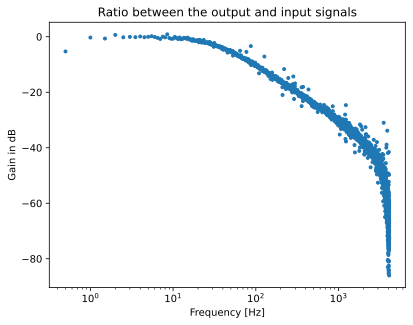

In [48]:
Gain = 20 * np.log10(Amp_2/Amp)
plt.semilogx(f, Gain, '.')
plt.title('Ratio between the output and input signals')
plt.ylabel('Gain in dB')
plt.xlabel('Frequency [Hz]')

#### 6 - Superimpose on this plot the filter's Bode diagram

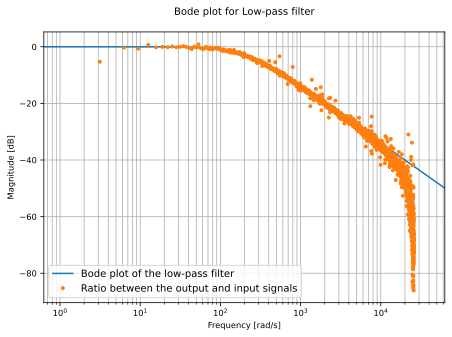

In [49]:
ct.bode(Hf, dB=True, plot_phase=False, omega_limits=[2*np.pi*0.1, 2*np.pi*10000], label="Bode plot of the low-pass filter")
w = 2 * np.pi * f
plt.semilogx(w, Gain, '.', label='Ratio between the output and input signals')
plt.legend()
plt.show()